# Systems of Linear Algebraic Equations

Solve the simultaneous equations $$\mathbf{Ax}=\mathbf{b}$$

$$A_{11}x_1+A_{12}x_2+\cdots+A_{1n}x_n=b_1 \\ A_{21}x_1+A_{22}x_2+\cdots+A_{2n}x_n=b_2 \\ 
\vdots \\
A_{n1}x_1+A_{n2}x_2+\cdots+A_{nn}x_n=b_n$$

This can be written in matrix notation as

$$\left[ \begin{matrix}
A_{11} & A_{12} & \cdots & A_{1n} \\
A_{21} & A_{22} & \cdots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{n1} & A_{n2} & \cdots & A_{nn} \\
\end{matrix} \right] \left[ \begin{matrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n} \\
\end{matrix} \right] = \left[ \begin{matrix}
b_{1} \\
b_{2} \\
\vdots \\
b_{n} \\
\end{matrix} \right]$$

## Uniqueness (nonsingular)
To solve this system of equations, we must first prove there is uniqueness of solution (meaning the matrix is nonsingular). A matrix is singular (or ill conditioned) if there are linear dependencies i.e one row is a simple multiple of another row.

A test for singularity would be if the determinant $|\mathbf{A}|$ is small. But small relative to what. That reference is called the matrix norm $||\mathbf{A}||$, therefore the matrix is singular if 

$$|\mathbf{A}|<<||\mathbf{A}||$$

Condition is another way to find this at it is defined as

$$cond(\mathbf{A})=||\mathbf{A}||\cdot||\mathbf{A}^-1||$$

If the condition number is close to one, the matrix is well conditioned. As the conditioning number increases the degree of ill conditioning increases eventually reaching infinity as the matrix becomes singular.

## Examples

$$3x_1+2x_2 = 18\\
-x_1+2x_2 = 2$$

In [62]:
import numpy as np
import matplotlib.pyplot as plt
def f1(x): return (-3*x+18)/2
def f2(x): return (2+x)/2
x = np.arange(0,10,.01)

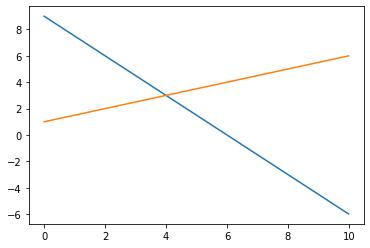

In [63]:
plt.plot(x,f1(x),x,f2(x))

### Building the matrix solution

In [64]:
A = np.matrix([[3,2],[-1,2]])
b = np.matrix([[18],[2]])

In [65]:
A

matrix([[ 3,  2],
        [-1,  2]])

In [66]:
b

matrix([[18],
        [ 2]])

#### Finding the determinant

In [67]:
np.linalg.det(A)

8.000000000000002

#### Finding the condition number

In [68]:
np.linalg.cond(A)

1.640388203202208

#### Finding the inverse solution

In [69]:
A.I*b

matrix([[4.],
        [3.]])

#### Using the linear algebra package in numpy

In [70]:
np.linalg.solve(A,b)

matrix([[4.],
        [3.]])

#### Using an explicit gaussian elimination routine function

In [71]:
'''x = gauss_elimin(a, b)
Solves [a][x] = [b] by Gauss elimination with no pivoting
'''
from numpy import dot, array

def gauss_elimin(a, b):
    (rows, cols) = a.shape
  # elimination phase
    for row in range(0, rows-1): # pivot equation/row
        for i in range(row+1, rows):
          if a[i, row] != 0.0:
            factor = a [i, row]/a[row, row]
            a[i, row+1:rows] = a[i, row+1:rows] - factor*a[row, row+1:rows]
            b[i] = b[i] - factor*b[row]
  # back substitution 
    for k in range(rows-1,-1,-1):
        b[k] = (b[k] - dot(a[k, k+1:rows],b[k+1:rows]))/a[k, k]
    return b


print (gauss_elimin(A, b))

[[3]
 [4]]


### Demonstration of ill-posed problems

In [72]:
def f1(x): return (-3.0001*x+18)
def f2(x): return (-3*x+36)
x = np.arange(0,10,.01)

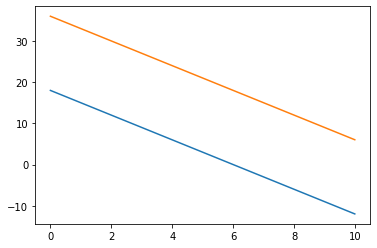

In [73]:
plt.plot(x,f1(x),x,f2(x))

In [74]:
A = np.matrix([[3.0001,1],[3,1]])
b = np.matrix([[18,36]])

In [75]:
np.linalg.cond(A)

200006.0000950038

In [76]:
np.linalg.det(A)

0.00010000000000018323

In [77]:
np.linalg.norm(A)

4.472203037653814

In [78]:
np.linalg.solve(A,b.T)

matrix([[-179999.99999967],
        [ 540035.99999901]])

### Simple example of LU Decomposition

In [79]:
A = np.matrix([[8.,-6.,2.],[-4.,11.,-7.],[4.,-7.,6.]])
b = np.matrix([28.,-40.,33.])
A.I*b.T

matrix([[ 2.],
        [-1.],
        [ 3.]])

#### Perform LU Decomposition

In [80]:
import scipy.linalg
P,L,U = scipy.linalg.lu(A)
L,U

(array([[ 1. ,  0. ,  0. ],
        [-0.5,  1. ,  0. ],
        [ 0.5, -0.5,  1. ]]), array([[ 8., -6.,  2.],
        [ 0.,  8., -6.],
        [ 0.,  0.,  2.]]))

#### solve using L and b

In [81]:
d= np.linalg.solve(L,b.T)

#### Solve using U and y

In [82]:
x = np.linalg.solve(U,d)
x

matrix([[ 2.],
        [-1.],
        [ 3.]])

## Real World Problem

### Staged seperation process

In a two-stage seperation process, we know the inlet flow rate (100bbl/d) and we know the compositional weight fraction of all of the streams. How can we use mass balance and matrices to calculate the flow rate of all the streams.

Inlet to stage one flow rate $F$ is 100bbl/d with compositions of $w_{C1}=0.2,w_{C2}=0.6,w_{C3}=0.2$

Light outlet to stage one flow rate is $x1$ with compositions of $w_{C1}=0.8,w_{C2}=0.2,w_{C3}=0.0$

Light outlet to stage two flow rate is $x2$ with compositions of $w_{C1}=0.05,w_{C2}=0.85,w_{C3}=0.05$

Heavy outlet to stage two flow rate is $x3$ with compositions of $w_{C1}=0.0,w_{C2}=0.2,w_{C3}=0.8$

#### Build the matrix

In [83]:
A = np.matrix([[1,1,1],[0.8,0.05,0],[0.2,0.85,0.2]])
b = np.matrix([[100],[20],[60]])

#### Solve

In [84]:
np.linalg.solve(A,b)

matrix([[21.15384615],
        [61.53846154],
        [17.30769231]])

In [85]:
import scipy.linalg
P,L,U = scipy.linalg.lu(A)
L,U

(array([[ 1.        ,  0.        ,  0.        ],
        [ 0.8       ,  1.        ,  0.        ],
        [ 0.2       , -0.86666667,  1.        ]]),
 array([[ 1.        ,  1.        ,  1.        ],
        [ 0.        , -0.75      , -0.8       ],
        [ 0.        ,  0.        , -0.69333333]]))

In [87]:
d = np.linalg.solve(L,b)

In [88]:
x = np.linalg.solve(U,d)
x

matrix([[21.15384615],
        [61.53846154],
        [17.30769231]])